# Analysis of host prices of Seattle AirBnB
We will use the Seattle AirBnB dataset combined with the Poi dataset generated using the Overpass API.
I report here the three business questions to we will respond:
1. How much does cost accommodation in Seattle?
2. Which factors do they influence the price?
3. Do Poi influence the price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import preprocessing
import  sklearn as s
%matplotlib inline

airbnb_df = pd.read_csv('listings.csv')
pointofinterest_df = pd.read_csv('seattle_poi.csv', index_col=0)

## Data Understanding

In [2]:
airbnb_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [3]:
pointofinterest_df

,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport
0,31,1441,432,390,136,1,35,6118,1668
1,33,1514,458,400,155,1,36,6684,1820
2,30,1515,424,422,144,1,38,6084,1702
3,31,1465,429,387,136,1,33,6336,1707
4,28,1447,428,404,134,1,37,5958,1646
...,...,...,...,...,...,...,...,...,...
3813,25,1112,294,273,124,0,30,4904,1954
3814,29,1540,399,377,181,1,35,6900,2146
3815,3,52,20,15,8,0,1,148,75
3816,20,694,193,179,138,0,10,3639,1199


In [4]:
df = pd.concat([airbnb_df, pointofinterest_df], axis = 1)

Now, we go to look inside the dataset. The first step detects the column's price.

In [5]:
[i for i in df.columns.tolist() if 'price' in i]

['price', 'weekly_price', 'monthly_price']

We found three columns daily, weekly and monthly price. Now the three questions can have three different answers each one. We explore more in deep the difference between the three types of price.

In [6]:
pd.concat([df[['price', 'weekly_price', 'monthly_price']].isnull().mean().rename("mean"),df[['price', 'weekly_price', 'monthly_price']].dtypes.rename("types")], axis = 1)

,mean,types
price,0.000000,object
weekly_price,0.473808,object
monthly_price,0.602672,object


In [7]:
df.drop(columns=['weekly_price','monthly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,reviews_per_month,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3191.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,2.078919,23.983761,1090.045836,305.942116,290.857255,118.269513,0.548979,23.742273,4511.218439,1519.377947
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,1.822348,11.330519,462.190443,140.779566,134.229349,52.511919,0.497660,10.098965,2051.371175,500.811507
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,0.020000,0.000000,42.000000,20.000000,11.000000,6.000000,0.000000,0.000000,148.000000,75.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,0.695000,14.000000,772.250000,186.000000,169.000000,76.000000,0.000000,21.000000,3045.500000,1253.500000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,1.540000,26.000000,1222.000000,361.000000,340.500000,134.000000,1.000000,26.000000,5184.500000,1682.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,3.000000,34.000000,1426.000000,433.000000,412.000000,161.000000,1.000000,29.000000,6010.750000,1872.750000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,12.150000,39.000000,1883.000000,489.000000,465.000000,203.000000,1.000000,42.000000,7843.000000,2283.000000


For more readability of code, we save in a variable the rows to use for each type of price.

In [8]:
price_rows = df['price'].isnull() == False
weekly_rows = df['weekly_price'].isnull() == False
monthly_rows = df['monthly_price'].isnull() == False

In [9]:
df[weekly_rows].drop(columns=['price','monthly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,reviews_per_month,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport
count,2.009000e+03,2.009000e+03,2.009000e+03,2007.000000,2007.000000,2009.000000,2009.000000,2009.000000,2001.000000,2005.000000,...,1800.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,5.118851e+06,2.016010e+13,1.468009e+07,4.857997,4.857997,47.629659,-122.332230,3.282728,1.237881,1.284788,...,2.016972,22.973619,1056.650075,293.368840,278.984569,114.047785,0.505226,23.006969,4365.777501,1490.178696
std,2.864888e+06,0.000000e+00,1.386092e+07,15.915100,15.915100,0.044921,0.032757,1.901380,0.550122,0.871020,...,1.756977,11.403536,472.937791,142.131973,135.327503,53.573754,0.500097,10.412505,2106.386000,518.132094
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.416362,1.000000,0.500000,0.000000,...,0.020000,0.000000,42.000000,20.000000,12.000000,6.000000,0.000000,0.000000,148.000000,75.000000
25%,2.746782e+06,2.016010e+13,2.911360e+06,1.000000,1.000000,47.607951,-122.355344,2.000000,1.000000,1.000000,...,0.690000,12.000000,706.000000,170.000000,151.000000,70.000000,0.000000,18.000000,2819.000000,1210.000000
50%,5.500398e+06,2.016010e+13,9.365736e+06,1.000000,1.000000,47.625255,-122.327712,3.000000,1.000000,1.000000,...,1.470000,26.000000,1188.000000,316.000000,311.000000,128.000000,1.000000,25.000000,4927.000000,1630.000000
75%,7.649837e+06,2.016010e+13,2.409199e+07,3.000000,3.000000,47.664437,-122.309165,4.000000,1.000000,2.000000,...,2.930000,34.000000,1423.000000,425.000000,408.000000,159.000000,1.000000,29.000000,5966.000000,1881.000000
max,1.033914e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,4.500000,6.000000,...,12.150000,39.000000,1883.000000,488.000000,465.000000,203.000000,1.000000,42.000000,7843.000000,2275.000000


In [10]:
df[monthly_rows].drop(columns=['price','weekly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,reviews_per_month,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport
count,1.517000e+03,1.517000e+03,1.517000e+03,1516.000000,1516.000000,1517.000000,1517.000000,1517.000000,1511.000000,1515.000000,...,1361.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,5.086702e+06,2.016010e+13,1.439918e+07,5.629288,5.629288,47.630234,-122.331885,3.346737,1.212773,1.277888,...,2.061896,22.539222,1040.141068,287.839156,273.571523,112.150297,0.489782,22.631510,4293.270270,1481.267633
std,2.898048e+06,0.000000e+00,1.364368e+07,20.516075,20.516075,0.045524,0.032681,1.905349,0.528238,0.843817,...,1.706424,11.345873,471.377060,141.633857,135.498911,53.503272,0.500060,10.535435,2098.044816,517.455609
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.508394,-122.416362,1.000000,0.500000,0.000000,...,0.020000,1.000000,43.000000,21.000000,12.000000,6.000000,0.000000,0.000000,198.000000,85.000000
25%,2.638086e+06,2.016010e+13,2.911360e+06,1.000000,1.000000,47.607582,-122.354435,2.000000,1.000000,1.000000,...,0.760000,12.000000,692.000000,160.000000,145.000000,69.000000,0.000000,15.000000,2768.000000,1201.000000
50%,5.422159e+06,2.016010e+13,9.077850e+06,1.000000,1.000000,47.625526,-122.328552,3.000000,1.000000,1.000000,...,1.590000,24.000000,1159.000000,299.000000,301.000000,127.000000,0.000000,25.000000,4805.000000,1616.000000
75%,7.636185e+06,2.016010e+13,2.387872e+07,3.000000,3.000000,47.665856,-122.309190,4.000000,1.000000,2.000000,...,3.000000,33.000000,1405.000000,420.000000,403.000000,157.000000,1.000000,29.000000,5870.000000,1867.000000
max,1.033125e+07,2.016010e+13,5.022512e+07,502.000000,502.000000,47.733358,-122.256081,15.000000,4.500000,6.000000,...,10.950000,39.000000,1883.000000,488.000000,465.000000,202.000000,1.000000,42.000000,7843.000000,2275.000000


The daily price is defined for each host of the dataset, as opposed to the weekly and monthly price those defined for a subset of the entire set of data.
These different sets show a partial different distribution of data, this may result to give different answers for each type of price.

Weekly and monthly price columns have NA values on the dataset. We can continue to explore without them.

In [11]:
daily_df = df[price_rows].drop(columns=['weekly_price','monthly_price'])

na_mean = pd.concat([daily_df.isnull().mean().rename("mean"),daily_df.dtypes.rename("types")], axis = 1)
na_mean[na_mean['mean'] > 0.4] #Too much NA, candidate to drop

,mean,types
notes,0.420639,object
square_feet,0.974594,float64
security_deposit,0.511262,object
license,1.000000,float64


These attributes have many NA values. They are good candidates to drop.

In [12]:
desc_obj_df = df.drop(columns = ['price','weekly_price','monthly_price','notes', 'security_deposit']).select_dtypes(['object']).describe().transpose()
desc_obj_df = desc_obj_df[(desc_obj_df['unique'] < 0.2*desc_obj_df['count']) & (desc_obj_df['freq'] < (desc_obj_df['count']*0.7))]
desc_obj_index = desc_obj_df.index
desc_obj_df

,count,unique,top,freq
host_response_time,3295,4,within an hour,1692
host_neighbourhood,3518,102,Capitol Hill,405
host_verifications,3818,116,"['email', 'phone', 'facebook', 'reviews', 'kba']",595
neighbourhood,3402,81,Capitol Hill,351
neighbourhood_cleansed,3818,87,Broadway,397
neighbourhood_group_cleansed,3818,17,Other neighborhoods,794
zipcode,3811,28,98122,420
property_type,3817,16,House,1733
room_type,3818,3,Entire home/apt,2541
cleaning_fee,2788,118,$50.00,310


We have selected the string with unique values lower than 20% of elements, and the most frequent value is lower than 70% of the number of rows.

In [13]:
desc_numeric_df = df.drop(columns = ['price','weekly_price','monthly_price']).select_dtypes(['float64','int64']).describe().transpose()
desc_numeric_df[(desc_numeric_df['count'] == 0) | (desc_numeric_df['std'] == 0)]

,count,mean,std,min,25%,50%,75%,max
scrape_id,3818.0,2.016010e+13,0.0,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
license,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The license column has only NaN values. The standard deviation of the scrape_id column is 0 because the values are always equal on the dataset.

## Prepare Data

In [14]:
dollar_columns = ['price','weekly_price','monthly_price','extra_people','cleaning_fee']
for col in dollar_columns: #Transform from string to numeric value
    df[col] = pd.to_numeric(df[col].str.replace('[\,\$]','',regex = True))


The variable dollar_columns contains numeric columns with dollar symbol. So, we strip dollar character and cast the string to number.

In [15]:
string_columns = ['room_type','property_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'neighbourhood', 'host_verifications', 'host_neighbourhood', 'host_response_time']
LE = s.preprocessing.LabelEncoder()
for col in string_columns:
    if(df[col].isnull().any()):
        df[col] = df[col].fillna(value='NA')
    df[col] = LE.fit_transform(df[col])

We encode the categorical variables. If there are NA values, we create the NA level.

In [16]:
df.fillna(df.mean(), inplace = True)
df.loc[weekly_rows == False,'weekly_price'] = np.NaN
df.loc[monthly_rows == False,'monthly_price'] = np.NaN
df[['price', 'weekly_price', 'monthly_price']].isnull().mean()

price            0.000000
weekly_price     0.473808
monthly_price    0.602672
dtype: float64

We fill the numeric columns with their means. The weekly price and monthly price are numeric columns, so we restore their NA values because they are the outcomes.

In [17]:
df.drop(columns=['notes','square_feet','security_deposit','license','scrape_id'], inplace = True)

We drop the columns that we observed that they aren't as useful as predictors.

## Data Modeling (analyze and model)

In [18]:
df.corr(method='spearman')[['price','weekly_price','monthly_price']].style.background_gradient(cmap='coolwarm')

,price,weekly_price,monthly_price
id,-0.071821,-0.031272,0.003570
host_id,-0.075850,0.027648,0.040850
host_response_time,-0.137850,-0.094578,-0.013152
host_neighbourhood,-0.065561,-0.062373,-0.075099
host_listings_count,0.010237,-0.050284,-0.031383
host_total_listings_count,0.010237,-0.050284,-0.031383
host_verifications,0.018026,0.032540,0.004786
neighbourhood,-0.079271,-0.089225,-0.101199
neighbourhood_cleansed,-0.112977,-0.124351,-0.129307
neighbourhood_group_cleansed,-0.021711,-0.059371,-0.102053


We can observe that there isn't a strong correlation between price and the other variables. To determine which factors are good predictors, we can use the coefficients of linear regression.
To compare coefficients between them, we need to scale data.

In [19]:
def get_linear_regression(X,y, title = 'Not available'):
    """ 
    The function creates a linear model, plot the coefficient values, and print the accuracy of the model using R^2 score, MAE, MSE, and RMSE. 

    To permit the confront between coefficients, the X and y values are scaled. 
  
    Parameters: 
    X (pandas.DataFrame): Predictor dataframes
    y (pandas.Series): outcome Series    
    title (string): Title to display on top of plot. The the default is 'Not available'
  
    Returns: none
  
    """    
    scaler = preprocessing.StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns)
    y_scaled = pd.DataFrame(scaler.fit_transform(np.log(y.values).reshape(-1,1)), columns = [y.name])

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=22)

    lm_model = Ridge(random_state = 22)
    lm_model.fit(X_train, y_train)

    y_pred = lm_model.predict(X_test)

    r2_score = s.metrics.r2_score(y_test, y_pred)
    coeff_df = pd.DataFrame(lm_model.coef_[0], index = X_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending = False)
  
    seabornInstance.set_context('paper')
    f, ax = plt.subplots(figsize = (6,15))
    g = seabornInstance.barplot(x=coeff_df.Coefficient, y=coeff_df.index, palette="vlag").set_title(title)
    
    seabornInstance.despine(left = True, bottom = True)
    plt.show()    
    
    print('R^2:',r2_score)
    print('Mean Absolute Error:', s.metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', s.metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(s.metrics.mean_squared_error(y_test, y_pred)))

In [20]:
predictor_with_pointofinterest_columns = [
 #'id', 
 #'host_id',
 'host_response_time',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
# 'latitude',
# 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 #'cleaning_fee',
 'guests_included',
 #'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'historic',
 'shop',
 'tourism',
 'office',
 'emergency',
 'station',
 'craft',
 'amenity',
 'public_transport']

In [21]:
predictor_columns = [
 #'id', 
 #'host_id',
 'host_response_time',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
# 'latitude',
# 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 #'cleaning_fee',
 'guests_included',
 #'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
# 'historic',
# 'shop',
# 'tourism',
# 'office',
# 'emergency',
# 'station',
# 'craft',
# 'amenity',
# 'public_transport'
]

We exclude cleaning_fee and extra_people because they are variables semantically linked to the cost. These predictors aren't useful to answer business questions.

## Evaluate the Results 

### How much does cost accommodation in Seattle?

Mean:  127.97616553169199  Std. Dev:  90.25002216147982
Mode:  0    150.0
dtype: float64  Median:  100.0


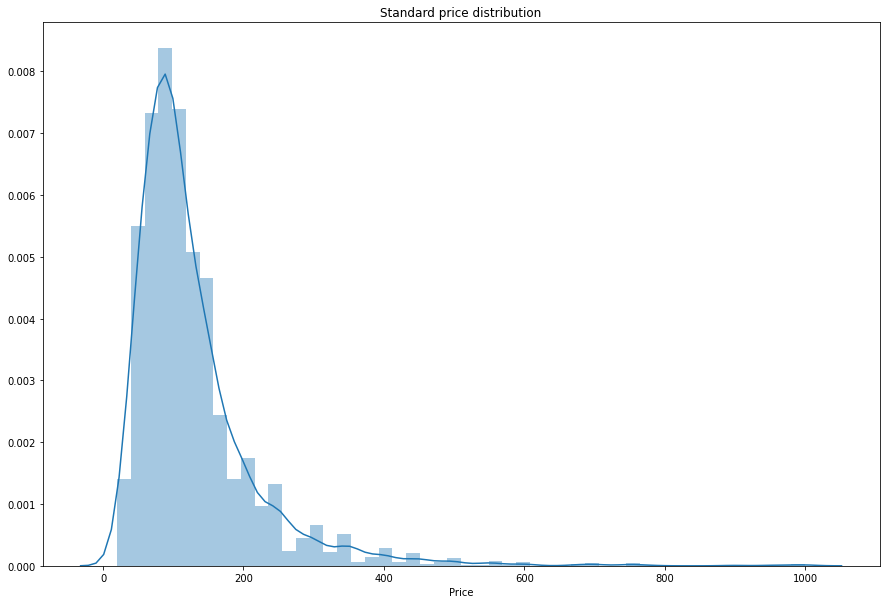

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['price'], axlabel = 'Price').set_title('Standard price distribution')
print('Mean: ',df['price'].mean(),' Std. Dev: ', df['price'].std())
print('Mode: ',df['price'].mode(), ' Median: ',df['price'].median())

Mean:  788.4818317570931  Std. Dev:  532.3522687481143
Mode:  0    500.0
dtype: float64  Median:  650.0


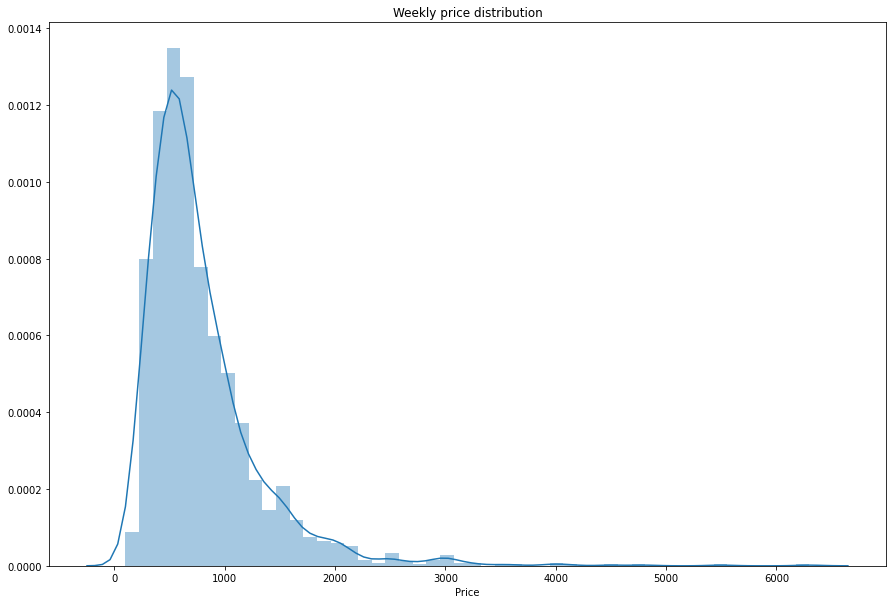

In [23]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['weekly_price'], axlabel = 'Price').set_title('Weekly price distribution')
print('Mean: ',df['weekly_price'].mean(),' Std. Dev: ', df['weekly_price'].std())
print('Mode: ',df['weekly_price'].mode(), ' Median: ',df['weekly_price'].median())

Mean:  2613.336189848385  Std. Dev:  1722.2679811919616
Mode:  0    2500.0
dtype: float64  Median:  2200.0


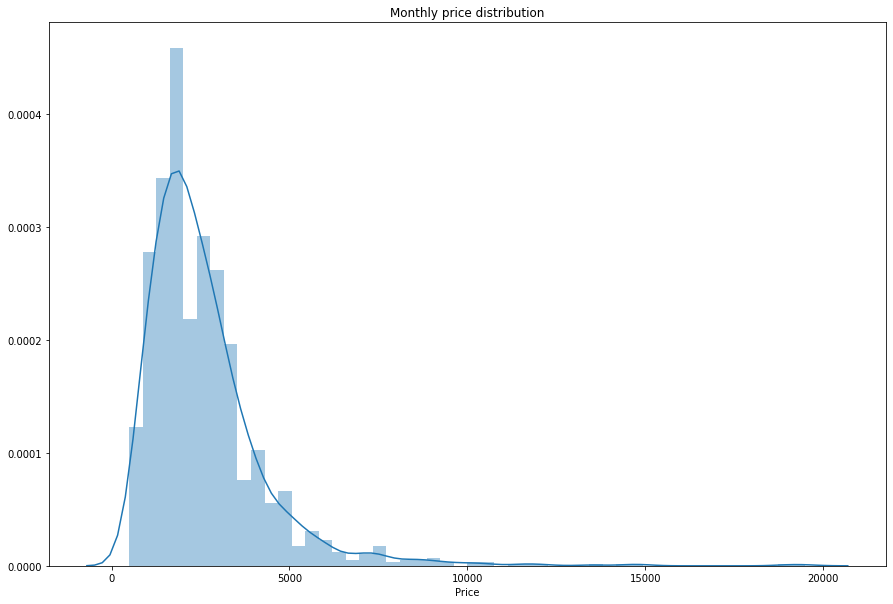

In [24]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['monthly_price'], axlabel = 'Price').set_title('Monthly price distribution')
print('Mean: ',df['monthly_price'].mean(),' Std. Dev: ', df['monthly_price'].std())
print('Mode: ',df['monthly_price'].mode(), ' Median: ',df['monthly_price'].median())

We know the mean and distribution of prices for each type. But are convenient weekly and monthly prices?

Mean:  0.930512904688885  Std. Dev:  0.19350354371569953
Mode:  0    0.857143
dtype: float64  Median:  0.9047619047619048
Ratio over 1:  0.22896963663514186


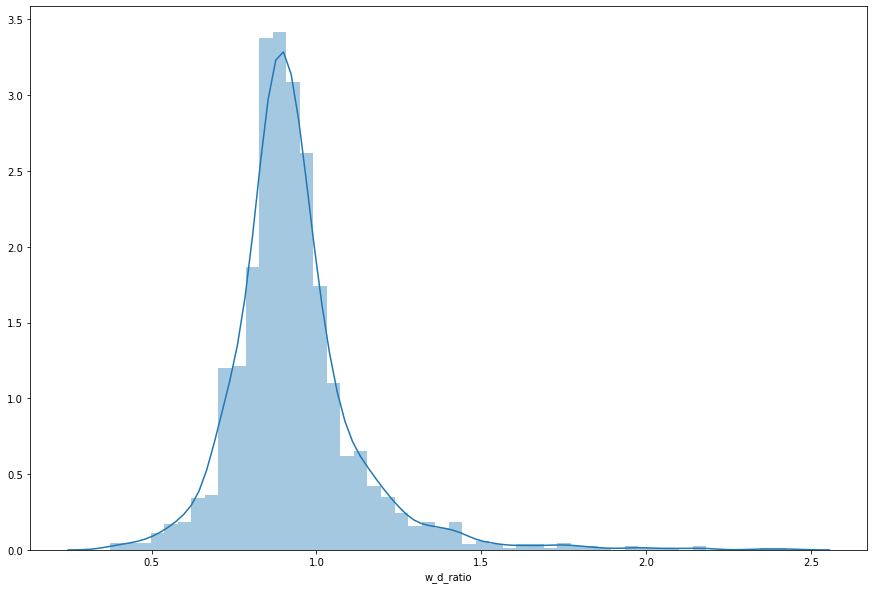

In [25]:
weekly_df = df[weekly_rows]
weekly_df = pd.concat([weekly_df, pd.DataFrame(weekly_df['weekly_price']/(weekly_df['price']*7), columns=['w_d_ratio'])], axis = 1)

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(weekly_df['w_d_ratio'])
print('Mean: ',weekly_df['w_d_ratio'].mean(),' Std. Dev: ', weekly_df['w_d_ratio'].std())
print('Mode: ',weekly_df['w_d_ratio'].mode(), ' Median: ',weekly_df['w_d_ratio'].median())
print('Ratio over 1: ',weekly_df[weekly_df['w_d_ratio'] > 1].w_d_ratio.count()/weekly_df.shape[0])

Mean:  0.7928802580859332  Std. Dev:  0.23161503275330675
Mode:  0    0.714286
dtype: float64  Median:  0.7653061224489796
Ratio over 1:  0.1133816743572841


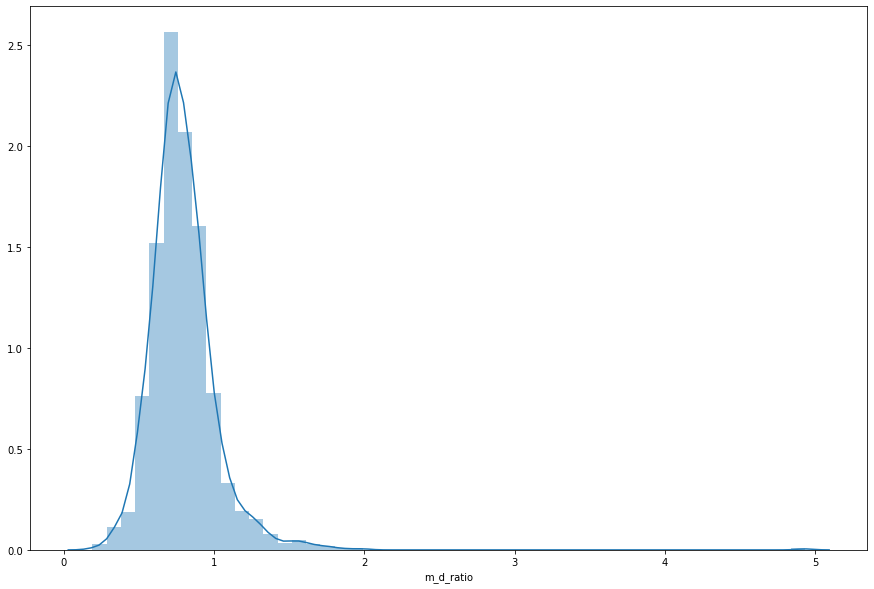

In [26]:
monthly_df = df[monthly_rows]
monthly_df = pd.concat([monthly_df, pd.DataFrame(monthly_df['monthly_price']/(monthly_df['price']*28), columns=['m_d_ratio'])], axis = 1) #monthly price starts from 28th days
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(monthly_df['m_d_ratio'])
monthly_df[monthly_df['m_d_ratio'] > 1].m_d_ratio.count()/monthly_df.shape[0]
print('Mean: ',monthly_df['m_d_ratio'].mean(),' Std. Dev: ', monthly_df['m_d_ratio'].std())
print('Mode: ',monthly_df['m_d_ratio'].mode(), ' Median: ',monthly_df['m_d_ratio'].median())
print('Ratio over 1: ',monthly_df[monthly_df['m_d_ratio'] > 1].m_d_ratio.count()/monthly_df.shape[0])

We can generally assume that weekly and monthly prices are convenient. But this assumption is not always true, because 20% of the weekly price is worse than the daily price. 
In the monthly price this percentage drop to 10%.

### Which factors do they influence the price?

We proceed with a qualitative analysis using the coefficient of linear regression. To determine which predictors are significant to predict prices, we show a look at a correlation matrix.

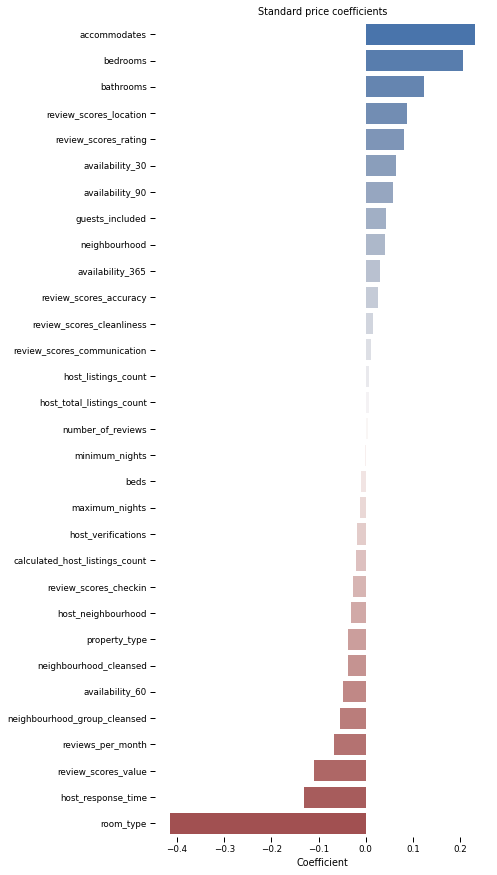

R^2: 0.6609311668670148
Mean Absolute Error: 0.44989091786712904
Mean Squared Error: 0.34144901177488385
Root Mean Squared Error: 0.5843363858043445


In [27]:
X = df.loc[price_rows,predictor_columns]
y = df.loc[price_rows,'price']

get_linear_regression(X,y, 'Standard price coefficients')

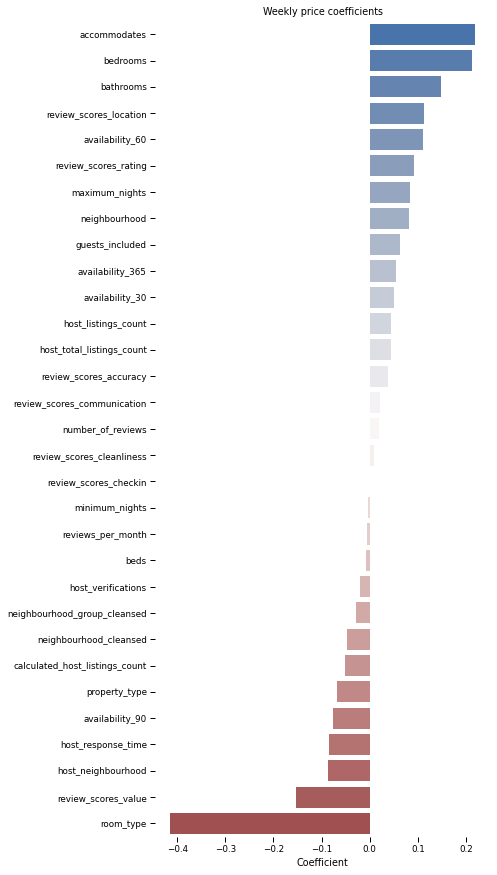

R^2: 0.6406961870323176
Mean Absolute Error: 0.4677561563251792
Mean Squared Error: 0.38276832032051356
Root Mean Squared Error: 0.6186827299355572


In [28]:
X = df.loc[weekly_rows,predictor_columns]
y = df.loc[weekly_rows,'weekly_price']

get_linear_regression(X,y, 'Weekly price coefficients')

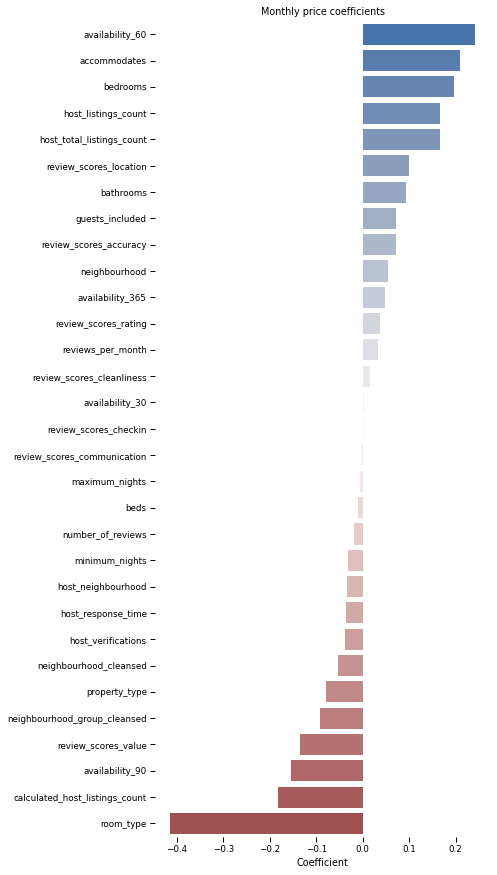

R^2: 0.4894382944659442
Mean Absolute Error: 0.5078769653152516
Mean Squared Error: 0.5794055064372259
Root Mean Squared Error: 0.7611869063753172


In [29]:
X = df.loc[monthly_rows,predictor_columns]
y = df.loc[monthly_rows,'monthly_price']


get_linear_regression(X,y, 'Monthly price coefficients')

We observe that the most important predictors for the price are the bedroom, accommodate, bathroom, room type, and review score value variables.
Similarly,  these predictors are the most important for the weekly price.
The monthly price has analogous conditions like weekly price and standard price, but the availabilities to 60 days and 90 days acquire more importance.
An important aspect to consider it's that accuracy of the monthly regression is low.

### Do Point of interests influence the price?


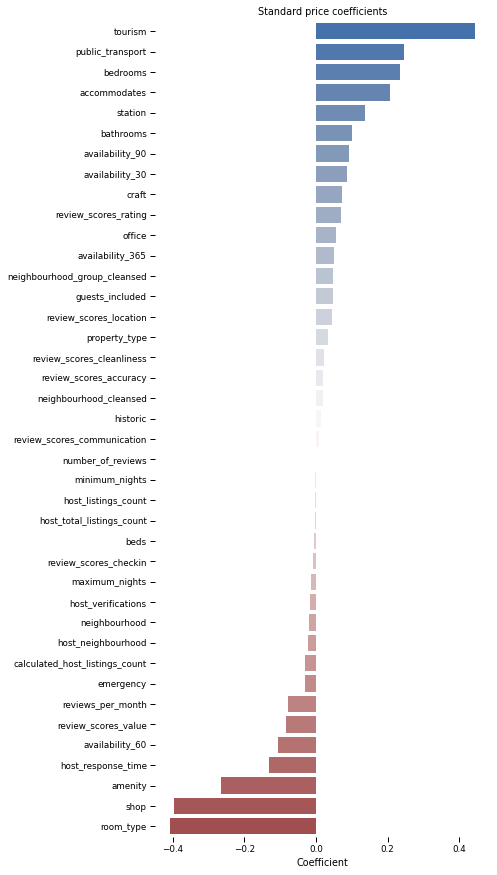

R^2: 0.6928262045536872
Mean Absolute Error: 0.4295286022707739
Mean Squared Error: 0.30933007887854885
Root Mean Squared Error: 0.5561745039810336


In [30]:
X = df.loc[price_rows,predictor_with_pointofinterest_columns]
y = df.loc[price_rows,'price']

get_linear_regression(X,y, 'Standard price coefficients')

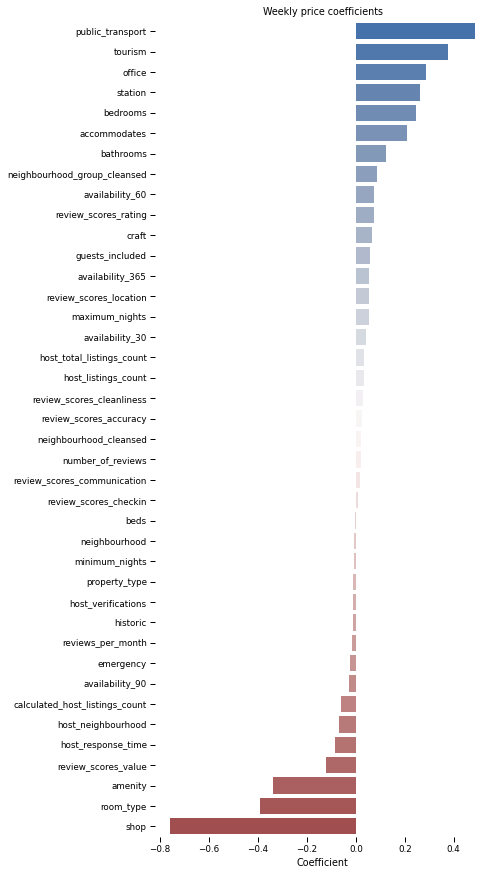

R^2: 0.6856514010623418
Mean Absolute Error: 0.4345647396731716
Mean Squared Error: 0.33487728453718535
Root Mean Squared Error: 0.5786858254158169


In [31]:
X = df.loc[weekly_rows,predictor_with_pointofinterest_columns]
y = df.loc[weekly_rows,'weekly_price']

get_linear_regression(X,y, 'Weekly price coefficients')

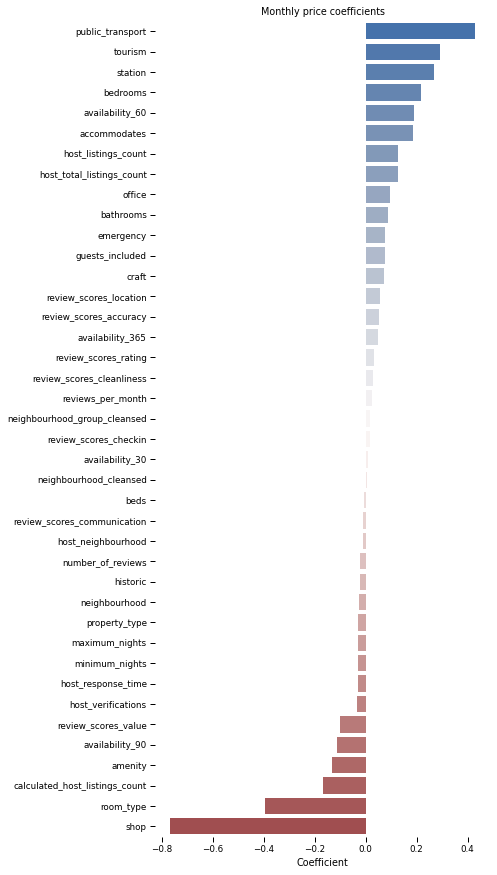

R^2: 0.6006225167354649
Mean Absolute Error: 0.46316283157828164
Mean Squared Error: 0.4532292775629599
Root Mean Squared Error: 0.6732230518653977


In [32]:
X = df.loc[monthly_rows,predictor_with_pointofinterest_columns]
y = df.loc[monthly_rows,'monthly_price']

get_linear_regression(X,y, 'Monthly price coefficients')

Combining the Airbnb dataset and the Poi dataset, the scenario looks different than precedent. For each price, we have a different situation. For the daily price, the principal predictors are tourism, bedroom, public transport, shop, and room type.
In the weekly price,  the tourism predictor loses importance, while office and public transport predictors acquire more importance.
Similarly, the public transport predictor is the most importance coefficent, but tourism reacquire importance at the expence of office predictor.